# 1. Импорт библиотек, модулей, моделей и данных

In [2]:
!pip install datasets >> None
!pip install transformers >> None
!pip install sentence-transformers >> None
!pip install langdetect >> None
!pip install torch >> None
!pip install --upgrade transformers >> None
!pip install sdgx >> None
!pip install language_tool_python >> None

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [36]:
# os
import numpy as np
from datasets import load_dataset, load_metric
from collections import Counter
import warnings
from random import randint
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import re
import language_tool_python

# transfromers & models
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer, pipeline, AutoModelForCausalLM
from transformers import BertForSequenceClassification, AutoModelForSeq2SeqLM, AutoTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import torch
from sklearn.cluster import KMeans
from langdetect import detect
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import XLNetLMHeadModel, XLNetTokenizer
from transformers import pipeline
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import BertTokenizer, BertModel
#from transformers import CTRLTokenizer, CTRLForCausalLM
from sdgx.data_connectors.csv_connector import CsvConnector
from sdgx.models.ml.single_table.ctgan import CTGANSynthesizerModel
from sdgx.synthesizer import Synthesizer
from sdgx.utils import download_demo_data

warnings.filterwarnings('ignore')

In [6]:
dataset_path = '/content/chatgpt.json'
dataset = load_dataset('json', data_files=dataset_path)
train_test_split = dataset['train'].train_test_split(test_size=0.2)

train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

train_df = pd.DataFrame(train_dataset)
test_df = pd.DataFrame(test_dataset)

train_df.to_csv('/content/train_dataset.csv', index=False)
test_df.to_csv('/content/test_dataset.csv', index=False)

Generating train split: 0 examples [00:00, ? examples/s]

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   role     35 non-null     object
 1   content  35 non-null     object
dtypes: object(2)
memory usage: 688.0+ bytes


In [8]:
train_df.head(10)

,role,content
0,user,Какие экономические отчеты ожидаются на этой н...
1,user,Какие акции торгуются на Нью-Йоркской фондовой...
2,user,Какие риски связаны с инвестированием в стартапы?
3,user,Какие акции показали наибольший рост в этом ме...
4,user,Какие факторы влияют на изменение валютного ку...
5,user,Какая доходность облигаций государственного за...
6,bot,В этом месяце наибольший рост показали акции T...
7,user,Что такое криптовалюта и как она работает?
8,bot,Риски инвестирования в стартапы включают высок...
9,bot,Курс евро к доллару изменился с 1.092 до 1.095...


In [11]:
# BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model_bert = BertModel.from_pretrained('bert-base-multilingual-cased')

# GPT-3 и GPT-2
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_gpt2 = AutoModelForCausalLM.from_pretrained(model_name)

# RoBERTa
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_RoBERTa = AutoModelForSequenceClassification.from_pretrained(model_name)

# XLNet
model_name = "xlnet-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_XLNet = AutoModelForSequenceClassification.from_pretrained(model_name)

# ALBERT
model_name = "albert-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_ALBERT = AutoModelForSequenceClassification.from_pretrained(model_name)

# T5 (Text-to-Text Transfer Transformer)
model_name = "t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_T5 = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# DistilBERT
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_DistilBERT = AutoModelForSequenceClassification.from_pretrained(model_name)

# BART (Bidirectional and Auto-Regressive Transformers)
model_name = "facebook/bart-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_BART = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# ELECTRA
model_name = "google/electra-small-discriminator"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_ELECTRA = AutoModelForSequenceClassification.from_pretrained(model_name)

# Longformer
model_name = "allenai/longformer-base-4096"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Longformer
model_name = "allenai/longformer-base-4096"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_Longformer = AutoModelForSequenceClassification.from_pretrained(model_name)

# DeBERTa
model_name = "microsoft/deberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_DeBERTa = AutoModelForSequenceClassification.from_pretrained(model_name)

# MT5 (Multilingual T5)
model_name = "google/mt5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_MT5 = AutoModelForSeq2SeqLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-small-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/559M [00:00<?, ?B/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# 1. Генерация датасета

## 1.1. T5-large

In [ ]:
model_name = 't5-large'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

def generate_t5(prompt, max_length=150, temperature=0.7, top_k=50):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')

    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,
        top_k=top_k,
        do_sample=True
    )

    return tokenizer.decode(output[0], skip_special_tokens=True)

for idx, row in train_df.iterrows():
    prompt = f"сгенерируй текст для {row['role']}: {row['content']}"
    synthetic_text = generate_t5(prompt)
    print(f"Оригинальный текст: {row['content']}")
    print(f"Синтетический текст: {synthetic_text}\n")

## 1.2. Bart-large

In [ ]:
model_name = 'facebook/bart-large'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

def generate_bart(prompt, max_length=150, temperature=0.7, top_p=0.9, top_k=50, num_beams=5):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')

    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        num_beams=num_beams,
        do_sample=True
    )

    return tokenizer.decode(output[0], skip_special_tokens=True)

for idx, row in train_df.iterrows():
    prompt = f"сгенерируй текст для {row['role']}: {row['content']}"
    synthetic_text = generate_bart(prompt)
    print(f"Оригинальный текст: {row['content']}")
    print(f"Синтетический текст: {synthetic_text}\n")

## 1.3. XLNet

In [ ]:
model_name = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(model_name)
model = XLNetLMHeadModel.from_pretrained(model_name)

def generate_xlnet(prompt, max_length=150, temperature=0.7, top_p=0.9, top_k=50, num_beams=5):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')

    output = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        num_beams=num_beams,
        do_sample=True
    )

    return tokenizer.decode(output[0], skip_special_tokens=True)

for idx, row in train_df.iterrows():
    prompt = f"сгенерируй текст для {row['role']}: {row['content']}"
    synthetic_text = generate_xlnet(prompt)
    print(f"Оригинальный текст: {row['content']}")
    print(f"Синтетический текст: {synthetic_text}\n")

## 1.4. SDGX

In [9]:
dataset_csv = '/content/train_dataset.csv'

data_connector = CsvConnector(path=dataset_csv)
synthesizer = Synthesizer(
    model=CTGANSynthesizerModel(epochs=1),  # For quick demo
    data_connector=data_connector,
)
synthesizer.fit()
sampled_data = synthesizer.sample(1000)
print(sampled_data)
sampled_data.to_csv('financial_dialogue_dataset.csv', index=False)

2024-09-07 23:28:26.180 | INFO     | sdgx.data_models.metadata:from_dataloader:280 - Inspecting metadata...
2024-09-07 23:28:26.304 | INFO     | sdgx.data_models.metadata:update_primary_key:482 - Primary Key updated: {'content'}.
2024-09-07 23:28:26.305 | INFO     | sdgx.synthesizer:fit:290 - Fitting data processors...
2024-09-07 23:28:26.308 | INFO     | sdgx.synthesizer:fit:300 - Initializing processed data loader...
2024-09-07 23:28:26.437 | INFO     | sdgx.synthesizer:fit:307 - Initialized processed data loader in 0.12654995918273926s
2024-09-07 23:28:26.438 | INFO     | sdgx.synthesizer:fit:309 - Starting model fit...
2024-09-07 23:28:26.448 | INFO     | sdgx.models.ml.single_table.ctgan:_pre_fit:221 - Fitting model's transformer...
2024-09-07 23:28:26.470 | INFO     | sdgx.models.ml.single_table.ctgan:_pre_fit:223 - Transforming data...
2024-09-07 23:28:26.600 | INFO     | sdgx.models.ml.single_table.ctgan:_fit:271 - Starting training, epochs: 1
2024-09-07 23:28:26.925 | INFO    

     role                                            content
0     bot     Каковы текущие котировки акций компании Apple?
1    user  Какие компании выплатят дивиденды в этом кварт...
2    user  В этом месяце наибольший рост показали акции T...
3    user  Как изменились ставки по ипотечным кредитам в ...
4     bot  Какие риски связаны с инвестированием в стартапы?
..    ...                                                ...
995  user  На изменение валютного курса влияют экономичес...
996   bot  В условиях нестабильной экономики рекомендуетс...
997   bot  На изменение валютного курса влияют экономичес...
998   bot  Текущий курс биткойна к доллару США составляет...
999  user  Как изменился курс евро к доллару за последние...

[1000 rows x 2 columns]


# 2. Benchmark
- Данный бенчмарк настроен для оценки сгенерированного датасета на основе различных параметров.

## 2.1. Проверка сложности данных

In [12]:
def dataset_complexity(data):
    text_lengths = [len(tokenizer.tokenize(text)) for text in data['content']]
    return {
        'avg_length': np.mean(text_lengths),
        'max_length': np.max(text_lengths),
        'min_length': np.min(text_lengths),
        'length_variability': np.std(text_lengths)
    }

complexity_stats = dataset_complexity(sampled_data)
print(f"Сложность датасета: {complexity_stats}")

Сложность датасета: {'avg_length': 21.746, 'max_length': 41, 'min_length': 12, 'length_variability': 9.116769383942977}


## 2.2. Оценка разнообразия токенов

In [13]:
def token_stats(data):
    all_tokens = [token for text in data['content'] for token in tokenizer.tokenize(text)]
    token_counter = Counter(all_tokens)
    return {
        'num_unique_tokens': len(token_counter),
        'top_10_tokens': token_counter.most_common(10)
    }

token_stats_train = token_stats(sampled_data)
print(f"Токенизация данных: {token_stats_train}")

Токенизация данных: {'num_unique_tokens': 331, 'top_10_tokens': [('▁', 2237), ('.', 625), ('и', 542), ('е', 530), ('?', 424), ('▁на', 420), ('▁Как', 391), (',', 376), ('ие', 351), ('▁в', 283)]}


## 2.3. Семантическая оценка данных (Semantic Data Analysis)

In [14]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def semantic_diversity(data, sample_size=100):
    sample_texts = data['content'][:sample_size]
    embeddings = model.encode(sample_texts)
    similarity_matrix = cosine_similarity(embeddings)

    avg_similarity = similarity_matrix.mean()
    max_similarity = similarity_matrix.max()

    return avg_similarity, max_similarity

avg_sim, max_sim = semantic_diversity(sampled_data)
print(f"Среднее семантическое сходство: {avg_sim}, Максимальное семантическое сходство: {max_sim}")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Среднее семантическое сходство: 0.753798246383667, Максимальное семантическое сходство: 1.0000003576278687


## 2.4. Проверка дублирования на уровне смысла:

  - Помимо текстовых дубликатов, полезно найти дубликаты на уровне смысла (семантические дубликаты). Для этого можно использовать модели, такие как Sentence-BERT, чтобы сравнивать предложения с помощью их эмбеддингов.


In [15]:
def find_semantic_duplicates(data, threshold=0.9):
    embeddings = model.encode(data['content'])
    similarity_matrix = cosine_similarity(embeddings)

    duplicate_pairs = []
    for i in range(len(similarity_matrix)):
        for j in range(i+1, len(similarity_matrix)):
            if similarity_matrix[i, j] > threshold:
                duplicate_pairs.append((i, j))

    return duplicate_pairs

sem_duplicates = find_semantic_duplicates(sampled_data, threshold=0.9)
print(f"Найдено семантических дубликатов: {len(sem_duplicates)}")

Найдено семантических дубликатов: 102736


## 2.5. Анализ редкости

In [16]:
def rare_tokens_analysis(data, threshold=5):
    token_counts = Counter([token for text in data['content'] for token in tokenizer.tokenize(text)])
    rare_tokens = {token: count for token, count in token_counts.items() if count < threshold}
    return rare_tokens

rare_tokens = rare_tokens_analysis(sampled_data)
print(f"Редкие токены (встречаются меньше раз): {len(rare_tokens)}")

nlp = spacy.load("en_core_web_sm")

def named_entity_analysis(data):
    entity_counts = Counter()
    for text in data['content']:
        doc = nlp(text)
        for ent in doc.ents:
            entity_counts[ent.text] += 1
    return entity_counts

entity_stats = named_entity_analysis(sampled_data)
print(f"Самые частые сущности: {entity_stats.most_common(10)}")

Редкие токены (встречаются меньше раз): 0
Самые частые сущности: [('Какие', 229), ('США', 97), ('Microsoft', 70), ('экономические', 64), ('по', 61), ('кредитам в этом месяце', 61), ('золота на следующий месяц', 60), ('валютного курса', 60), ('Apple', 59), ('Расскажи', 58)]


## 2.6. Оценка когерентности данных (Data Coherence Evaluation)

  - Когерентность текста может быть проверена через анализ плавности переходов между предложениями. Для этого можно использовать эмбеддинги предложений и оценить их плавность с точки зрения сходства.


In [17]:
def coherence_score(data, sample_size=100):
    sample_texts = data['content'][:sample_size]
    coherence_scores = []

    for text in sample_texts:
        sentences = text.split('. ')
        if len(sentences) > 1:
            sentence_embeddings = model.encode(sentences)
            sentence_similarities = cosine_similarity(sentence_embeddings)
            coherence_scores.append(sentence_similarities.mean())

    return np.mean(coherence_scores)

avg_coherence = coherence_score(sampled_data)
print(f"Средняя когерентность текстов: {avg_coherence}")

Средняя когерентность текстов: 0.9242082834243774


## 2.7. Оценка токсичности текста

In [20]:
toxicity_classifier = pipeline('text-classification', model='unitary/toxic-bert')
toxicity_results = sampled_data['content'].apply(lambda text: toxicity_classifier(text)[0])
print(f"Результаты токсичности:\n{toxicity_results}")

Результаты токсичности:
0      {'label': 'toxic', 'score': 0.0012878334382548...
1      {'label': 'toxic', 'score': 0.0019252945203334...
2      {'label': 'toxic', 'score': 0.0010723465820774...
3      {'label': 'toxic', 'score': 0.0024652634747326...
4        {'label': 'toxic', 'score': 0.0014840685762465}
                             ...                        
995    {'label': 'toxic', 'score': 0.001503880019299686}
996    {'label': 'toxic', 'score': 0.0015899939462542...
997    {'label': 'toxic', 'score': 0.001503880019299686}
998    {'label': 'toxic', 'score': 0.001470378483645618}
999    {'label': 'toxic', 'score': 0.001633794279769063}
Name: content, Length: 1000, dtype: object


## 2.8. Оценка запутанности

- Важный тест — это проверка на наличие в данных неоднозначных текстов, которые могут быть интерпретированы по-разному. Такие тексты могут приводить к сбоям в обучении и оценке модели.

In [19]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

def detect_ambiguous_texts(data, n_clusters=10):
    embeddings = model.encode(sampled_data['content'])
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(embeddings)

    ambiguous_texts = []
    for i in range(n_clusters):
        cluster_texts = [data['content'][j] for j in range(len(data['content'])) if clusters[j] == i]
        if len(cluster_texts) > 1:
            ambiguous_texts.append(cluster_texts)

    return ambiguous_texts

ambiguous_clusters = detect_ambiguous_texts(sampled_data)
print(f"Найдено {len(ambiguous_clusters)} неоднозначных кластеров.")

Найдено 10 неоднозначных кластеров.


## 2.9. Проверка баланса данных

- Оценка пропорциональности различных классов, тем, категорий в данных. Это важно для того, чтобы избежать перекоса модели в сторону чаще встречающихся категорий.

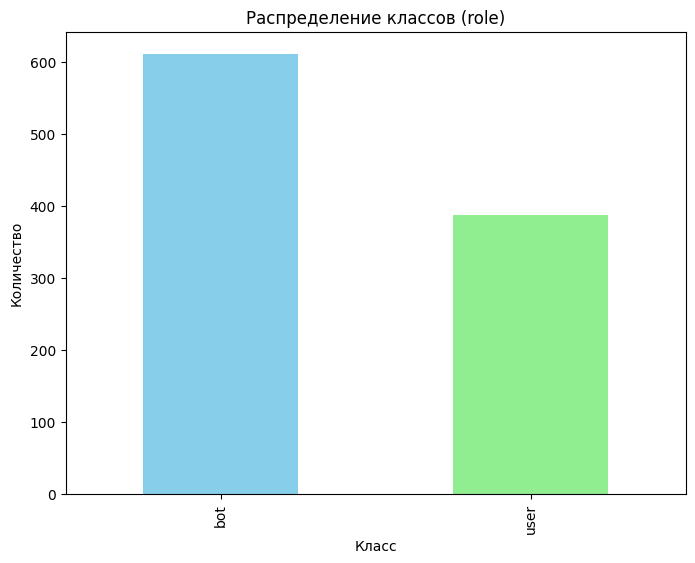

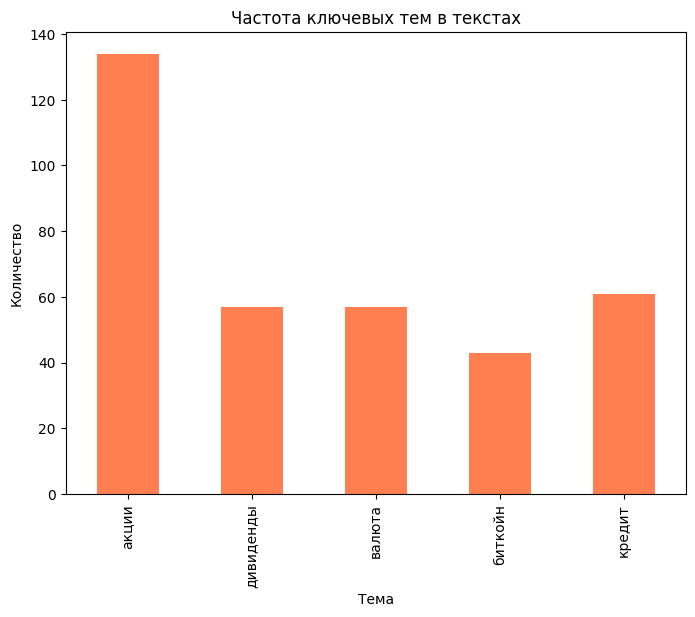

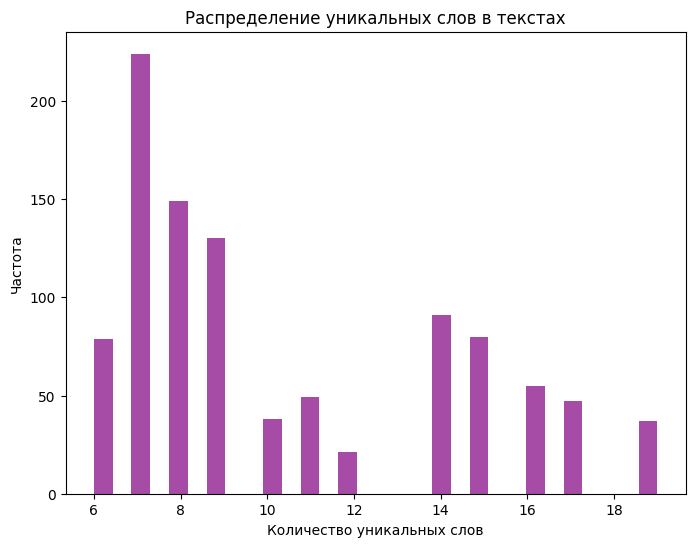

Распределение по классам 'role':
role
bot     612
user    388
Name: count, dtype: int64

Процентное соотношение классов:
role
bot     61.2
user    38.8
Name: proportion, dtype: float64

Частота ключевых слов в контенте:
{'акции': 134, 'дивиденды': 57, 'валюта': 57, 'биткойн': 43, 'кредит': 61}

Среднее количество уникальных слов в текстах:
10.431


In [26]:
role_counts = sampled_data['role'].value_counts()
role_proportions = sampled_data['role'].value_counts(normalize=True) * 100

keywords = ['акции', 'дивиденды', 'валюта', 'биткойн', 'кредит']
keyword_counts = {keyword: sampled_data['content'].str.contains(keyword, case=False).sum() for keyword in keywords}

def get_unique_word_count(text):
    words = text.split()
    return len(set(words))

sampled_data['unique_word_count'] = sampled_data['content'].apply(get_unique_word_count)

plt.figure(figsize=(8,6))
role_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Распределение классов (role)')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8,6))
pd.Series(keyword_counts).plot(kind='bar', color='coral')
plt.title('Частота ключевых тем в текстах')
plt.xlabel('Тема')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8,6))
sampled_data['unique_word_count'].plot(kind='hist', bins=30, color='purple', alpha=0.7)
plt.title('Распределение уникальных слов в текстах')
plt.xlabel('Количество уникальных слов')
plt.ylabel('Частота')
plt.show()

print("Распределение по классам 'role':")
print(role_counts)
print("\nПроцентное соотношение классов:")
print(role_proportions)

print("\nЧастота ключевых слов в контенте:")
print(keyword_counts)

print("\nСреднее количество уникальных слов в текстах:")
print(sampled_data['unique_word_count'].mean())

## 2.11. Оценка языковой вариативности

- Анализ частоты использования различных языковых конструкций, временных форм, типов предложений (например, вопросительные, утвердительные). Это поможет убедиться, что модель обучается на данных, которые содержат разнообразные структуры.


In [27]:
def classify_sentence_type(text):
    if text.strip().endswith('?'):
        return 'Вопросительное'
    else:
        return 'Утвердительное'

sampled_data['sentence_type'] = sampled_data['content'].apply(classify_sentence_type)

# 2. Временные формы: Настоящее, Прошедшее, Будущее время
def classify_tense(text):
    present_keywords = ['является', 'составляет', 'находится', 'влияют']  # Можете добавить свои маркеры
    past_keywords = ['было', 'составляло', 'влияли', 'произошло']
    future_keywords = ['будет', 'ожидается', 'прогнозируется', 'составит']

    if any(word in text for word in present_keywords):
        return 'Настоящее время'
    elif any(word in text for word in past_keywords):
        return 'Прошедшее время'
    elif any(word in text for word in future_keywords):
        return 'Будущее время'
    else:
        return 'Неопределённое время'

sampled_data['tense'] = sampled_data['content'].apply(classify_tense)

def classify_sentence_complexity(text):
    if ',' in text or ' и ' in text or ' но ' in text:
        return 'Сложное предложение'
    else:
        return 'Простое предложение'

sampled_data['sentence_complexity'] = sampled_data['content'].apply(classify_sentence_complexity)

sentence_type_counts = sampled_data['sentence_type'].value_counts()
tense_counts = sampled_data['tense'].value_counts()
sentence_complexity_counts = sampled_data['sentence_complexity'].value_counts()

print("Типы предложений (Утвердительные/Вопросительные):")
print(sentence_type_counts)

print("\nВременные формы (Настоящее/Прошедшее/Будущее):")
print(tense_counts)

print("\nСложность предложений (Простые/Сложные):")
print(sentence_complexity_counts)


Типы предложений (Утвердительные/Вопросительные):
sentence_type
Утвердительное    576
Вопросительное    424
Name: count, dtype: int64

Временные формы (Настоящее/Прошедшее/Будущее):
tense
Неопределённое время    869
Настоящее время         131
Name: count, dtype: int64

Сложность предложений (Простые/Сложные):
sentence_complexity
Простое предложение    587
Сложное предложение    413
Name: count, dtype: int64


## 2.12. Оценка структуры и формата текста

- Проверка на наличие нестандартных символов, неправильных разметок, сломанных предложений или HTML-тегов, которые могут мешать качественному обучению модели.

In [29]:
def contains_html(text):
    return bool(re.search(r'<[^>]+>', text))

sampled_data['contains_html'] = sampled_data['content'].apply(contains_html)

def contains_nonstandard_symbols(text):
    return bool(re.search(r'[^\w\s.,?!:;\'"()-]', text))

sampled_data['contains_nonstandard_symbols'] = sampled_data['content'].apply(contains_nonstandard_symbols)

def is_broken_sentence(text):
    return not bool(re.search(r'[.!?]$', text.strip()))

sampled_data['is_broken_sentence'] = sampled_data['content'].apply(is_broken_sentence)

def contains_extra_spaces(text):
    return bool(re.search(r'\s{2,}', text))

sampled_data['contains_extra_spaces'] = sampled_data['content'].apply(contains_extra_spaces)

print("Наличие HTML-тегов:")
print(sampled_data['contains_html'].value_counts())

print("\nНаличие нестандартных символов:")
print(sampled_data['contains_nonstandard_symbols'].value_counts())

print("\nСломанные предложения (нет завершающего знака препинания):")
print(sampled_data['is_broken_sentence'].value_counts())

print("\nНаличие дублирующихся пробелов:")
print(sampled_data['contains_extra_spaces'].value_counts())

Наличие HTML-тегов:
contains_html
False    1000
Name: count, dtype: int64

Наличие нестандартных символов:
contains_nonstandard_symbols
False    695
True     305
Name: count, dtype: int64

Сломанные предложения (нет завершающего знака препинания):
is_broken_sentence
False    1000
Name: count, dtype: int64

Наличие дублирующихся пробелов:
contains_extra_spaces
False    1000
Name: count, dtype: int64


## 2.13. Оценка грамматической правильности

Использование моделей проверки грамматики для оценки качества синтаксиса текста. Это поможет выявить ошибки, которые могут повлиять на результаты обучения.

In [33]:
tool = language_tool_python.LanguageTool('ru')

def grammar_check(text):
    matches = tool.check(text)
    return len(matches)  # Возвращаем количество найденных ошибок

sampled_data['grammar_errors'] = sampled_data['content'].apply(grammar_check)

print("Количество грамматических ошибок в каждом тексте:")
print(sampled_data[['content', 'grammar_errors']])
average_errors = sampled_data['grammar_errors'].mean()
print(f"\nСреднее количество ошибок на текст: {average_errors}")

INFO:language_tool_python.download_lt:Unzipping /tmp/tmp69vy_jtz.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


KeyboardInterrupt: 

## 2.14. Оценка эмоциональной окраски (Sentiment Analysis)

- Изучение того, как сбалансированы позитивные и негативные тексты. Это особенно важно, если модель должна работать с эмоционально нагруженными текстами.


In [35]:
sentiment_model = pipeline("sentiment-analysis", model="blanchefort/rubert-base-cased-sentiment")

def get_sentiment(text):
    result = sentiment_model(text)[0]
    label = result['label']
    score = result['score']
    return label, score

sampled_data['sentiment'], sampled_data['sentiment_score'] = zip(*sampled_data['content'].apply(get_sentiment))
print(sampled_data[['content', 'sentiment', 'sentiment_score']])

sentiment_counts = sampled_data['sentiment'].value_counts()
print("\nРаспределение эмоциональной окраски текстов:")
print(sentiment_counts)

config.json:   0%|          | 0.00/943 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/499 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

                                               content sentiment  \
0       Каковы текущие котировки акций компании Apple?   NEUTRAL   
1    Какие компании выплатят дивиденды в этом кварт...  NEGATIVE   
2    В этом месяце наибольший рост показали акции T...   NEUTRAL   
3    Как изменились ставки по ипотечным кредитам в ...   NEUTRAL   
4    Какие риски связаны с инвестированием в стартапы?   NEUTRAL   
..                                                 ...       ...   
995  На изменение валютного курса влияют экономичес...   NEUTRAL   
996  В условиях нестабильной экономики рекомендуетс...   NEUTRAL   
997  На изменение валютного курса влияют экономичес...   NEUTRAL   
998  Текущий курс биткойна к доллару США составляет...   NEUTRAL   
999  Как изменился курс евро к доллару за последние...   NEUTRAL   

     sentiment_score  
0           0.821379  
1           0.751423  
2           0.816558  
3           0.829832  
4           0.818643  
..               ...  
995         0.820225  

## 2.15. Проверка референтности (Fact-Checking):

- Оценка точности фактов в данных. Это важно, если модель должна обучаться на фактической информации.

In [ ]:
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

def check_fact(statement):
    input_text = f"fact: {statement} true or false?"
    input_ids = tokenizer.encode(input_text, return_tensors="pt")
    outputs = model.generate(input_ids, max_length=50)
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

statements = [
    "Apple stock price is $173.21.",
    "Microsoft will pay dividends this quarter.",
    "The current exchange rate for Bitcoin to USD is $50000."
]

for statement in statements:
    result = check_fact(statement)
    print(f"Statement: {statement}")
    print(f"Fact-Check Result: {result}\n")

## 2.16. Оценка стереотипов и предвзятости

- Анализ наличия в данных возможных стереотипов, предвзятости по гендерным, расовым и другим признакам, что может приводить к нежелательной генерации текста с подобными характеристиками.

In [ ]:
bias_keywords = ['мужчины', 'женщины', 'технические профессии', 'глава семьи', 'лучше', 'хуже']

def check_for_bias(text, keywords):
    found_keywords = [word for word in keywords if word in text.lower()]
    return found_keywords if found_keywords else None

df['bias_detected'] = df['content'].apply(lambda x: check_for_bias(x, bias_keywords))

print("Результаты проверки на предвзятость:")
print(df[['content', 'bias_detected']])

## 2.17. Анализ контекстной зависимости:

- Проверка, насколько тексты требуют от модели запоминания предыдущих частей текста для корректного понимания смысла текущего фрагмента.

In [ ]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

def score_text_with_context(context, continuation):
    input_text = context + " " + continuation
    input_ids = tokenizer.encode(input_text, return_tensors="pt")

    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss, logits = outputs[:2]

    return loss.item()

context = "Текущие котировки акций Apple составляют $173.21."
continuation_with_context = "Эта информация важна для инвесторов."
continuation_without_context = "Сегодня отличная погода."

score_with_context = score_text_with_context(context, continuation_with_context)
score_without_context = score_text_with_context("", continuation_with_context)

print(f"Оценка текста с контекстом: {score_with_context}")
print(f"Оценка текста без контекста: {score_without_context}")

## 2.18. Оценка задачи на многоязычность (Multilingual Task Evaluation)

  - Если модель должна поддерживать многоязычные задачи, важно проверить, как распределены языки в датасете и как модель работает с каждым языком.


In [73]:
def language_performance_analysis(data):
    languages = [detect(text) for text in data['content']]
    language_counts = Counter(languages)

    return language_counts

language_stats = language_performance_analysis(train_df)
print(f"Распределение по языкам: {language_stats}")

Распределение по языкам: Counter({'ru': 35})


## 2.19. Проверка баланса данных

  - Оценка пропорциональности различных классов, тем, категорий в данных. Это важно для того, чтобы избежать перекоса модели в сторону чаще встречающихся категорий.


In [83]:
# Функция для извлечения эмбеддингов текста
def get_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
        # Здесь может быть любая модель из представленных выше
        outputs = model_bert(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
        embeddings.append(cls_embedding)
    return np.vstack(embeddings)

embeddings = get_embeddings(train_df['content'])

# Проверка пропорциональности классов
class_counts = train_df['role'].value_counts()
print("Распределение классов (bot/user):")
print(class_counts)

# Оценка разнообразия тем по эмбеддингам
distances = pairwise_distances(embeddings, metric='cosine')
mean_distance = np.mean(distances)
print(f"Среднее косинусное расстояние между текстами: {mean_distance}")
if class_counts.max() / class_counts.min() > 2:
    print("\nПредупреждение: обнаружен дисбаланс классов.")
else:
    print("\nКлассы сбалансированы.")

Распределение классов (bot/user):
role
bot     19
user    16
Name: count, dtype: int64
Среднее косинусное расстояние между текстами: 0.16501468420028687

Классы сбалансированы.


## 2.20. Проверка на нелогичные данные (Inconsistency Detection)

  - Обнаружение противоречий в данных: Модель может страдать от низкого качества обучения, если в датасете содержатся противоречивые данные (например, противоречивые метки для одного и того же текста). Это можно выявить через кластеризацию текстов и проверку меток.


In [84]:
def get_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)
        outputs = model(**inputs)
        # Используем эмбеддинги CLS-токена для представления текста
        cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
        embeddings.append(cls_embedding)
    return np.vstack(embeddings)

embeddings = get_embeddings(train_df['content'])
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
train_df['cluster'] = kmeans.fit_predict(embeddings)

def check_inconsistencies(df, label_column, cluster_column):
    inconsistencies = []
    for cluster in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster]
        label_counts = Counter(cluster_data[label_column])
        if len(label_counts) > 1:
            inconsistencies.append((cluster, label_counts))
    return inconsistencies

inconsistencies = check_inconsistencies(train_df, 'role', 'cluster')

if inconsistencies:
    print("Обнаружены противоречия в кластерах:")
    for cluster, label_counts in inconsistencies:
        print(f"Кластер {cluster}: {label_counts}")
else:
    print("Противоречия не найдены.")

Противоречия не найдены.


# 3. Определение расширенного набора метрик

In [ ]:
# 3. Определение расширенного набора метрик
metrics = {
    "accuracy": load_metric("accuracy"),
    "f1": load_metric("f1"),
    "precision": load_metric("precision"),
    "recall": load_metric("recall"),
    "bleu": load_metric("bleu"),
    "rouge": load_metric("rouge"),
    "meteor": load_metric("meteor"),
    "bertscore": load_metric("bertscore"),
    "perplexity": None
}

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)

    results = {}
    for name, metric in metrics.items():
        if metric:
            if name == "bertscore":
                results[name] = metric.compute(predictions=p.predictions, references=p.label_ids, lang="en")  # BERTScore работает с текстами
            else:
                results[name] = metric.compute(predictions=predictions, references=labels)

    # Расчет Perplexity
    if 'eval_loss' in p:
        loss = p['eval_loss']
        perplexity = torch.exp(torch.tensor(loss)).item()
        results["perplexity"] = perplexity

    return results